In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading dataset using pandas
df= pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
#checking for duplicates
df.duplicated().sum()

0

In [5]:
#removing "serial" column as it not necessary furth
df.drop(columns=["Serial No."],inplace=True,axis=1)

In [6]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### performing Exploratory Data Analysis

### univariate analysis


In [8]:
print('Total no of Highest GRE score(340):',(df['GRE Score']==340).sum())
print('Total no of Highest TOEFL score(120):',(df['TOEFL Score']==120).sum())

Total no of Highest GRE score(340): 9
Total no of Highest TOEFL score(120): 9


In [9]:
print('minumum GRE Score:',df['GRE Score'].min())

minumum GRE Score: 290


In [10]:
print('minumum TOEFL score:',df['TOEFL Score'].min())

minumum TOEFL score: 92


In [11]:
print('Total no of Lowest GRE score:',(df['GRE Score']==290).sum())
print('Total no of Lowest TOEFL score:',(df['TOEFL Score']==92).sum())

Total no of Lowest GRE score: 2
Total no of Lowest TOEFL score: 1


In [12]:
print('Median GRE score:',df['GRE Score'].median())
print('Median TOEFL score:',df['TOEFL Score'].median())

Median GRE score: 317.0
Median TOEFL score: 107.0


### University Rating pie chart 

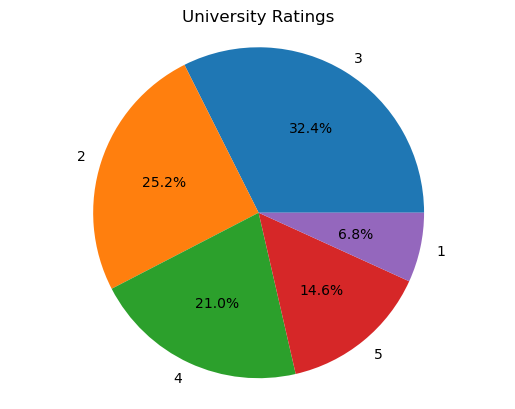

In [13]:
University_Rating=df['University Rating'].value_counts()
plt.pie(University_Rating, labels=University_Rating.index, autopct='%1.1f%%')
plt.title("University Ratings")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

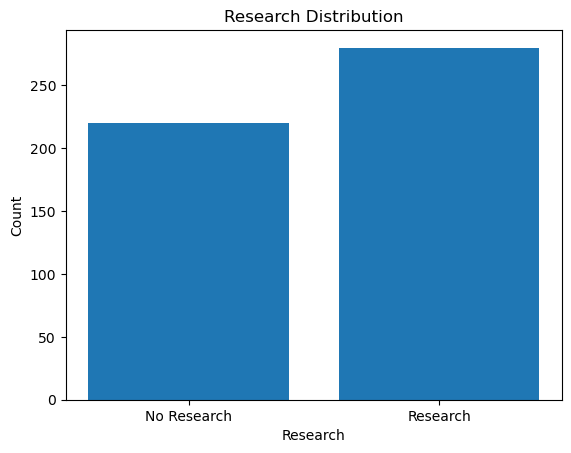

In [14]:
research_counts=df['Research'].value_counts()
plt.bar(research_counts.index, research_counts.values)
plt.xlabel("Research")
plt.ylabel("Count")
plt.title("Research Distribution")
plt.xticks([0, 1], ['No Research', 'Research'])
plt.show()

## Building Prediction Model

In [15]:
# separating target variable
X=df.iloc[:,1:].values
Y=df.iloc[:,-1].values

In [16]:
#Scaling the feature as they are not on same scale
from sklearn.preprocessing import StandardScaler

In [17]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [18]:
X.shape

(500, 7)

In [19]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
#shapes of the sets
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_train.shape)

x_train shape: (400, 7)
x_test shape: (100, 7)
y_train shape: (400,)
y_test shape: (400,)


# FITTING THE MODEL

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [22]:
LR= LinearRegression()

In [23]:
LR.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred= LR.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 1.0


# Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
DR=DecisionTreeRegressor(max_depth=5)

In [27]:
DR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [28]:
y1_pred= DR.predict(x_test)

In [29]:
print('r2_score_decision_tree',r2_score(y1_pred,y_test))

r2_score_decision_tree 0.9987207986712489


# RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=100, max_depth=5)

In [31]:
RFR.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [32]:
y2_pred= RFR.predict(x_test)

In [33]:
print('r2_score_random_forest :',r2_score(y2_pred,y_test))

r2_score_random_forest : 0.9997526236535837


# function to predict admission 

### The function below will print positive if the student has crossed the score "chance of admit" threshold which is above 0.5 else it will print negative

In [53]:
def predict_admission(input):
    input_array=np.array(input)
    input_reshaped= input_array.reshape(1,-1)
    prediction=DR.predict(input_reshaped)
    print(prediction)

In [57]:
predict_admission([220,89,2,2,2.5,7.6,0])

[0.7256]


In [56]:
predict_admission([200,99,1,3,2,6.8,1])

[0.85571429]
